<a href="https://colab.research.google.com/github/andipasti/smupo/blob/main/MT_Classic_LLM_openai_working_17_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Now you can proceed with your code that requires this environment variable
from google.colab import userdata
os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# Loading the dataset from a JSON file
df = pd.read_json('./drive/Othercomputers/X1/code/datas_mid.json')
display(df)

,issue_id,issue_title,issue_description,journal_id,journal_created_on,journal_notes,journal_author
0,116550,[MBA#1127156] Layout-Anpassung auf Typo 3 - We...,Guten Morgen\r\n\r\nIch habe eine eher speziel...,266857,2024-03-25 10:02:24,Bist du da dran?,0
1,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266862,2024-03-25 10:28:33,> PS: Weiss man was das Problem war? LG Andrea...,0
2,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266861,2024-03-25 10:17:20,KRW Andreas Berger\r\nKSL Cseri Laszlo\r\n\r\n...,0
3,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266851,2024-03-25 09:49:46,Super danke :-)\r\n\r\nTest Servicedesk erfolg...,0
4,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266847,2024-03-25 09:40:21,"Die Warteschlangen werden nun abgebaut, das Sy...",0
...,...,...,...,...,...,...,...
310,116383,"TBZ, Stundenplan: Ferien werden für Mandant 11...",Lieber Support\r\n\r\nBei der TBZ werden die F...,265951,2024-03-04 09:22:33,Die Lektionen in den Ferien werden nun nicht m...,0
311,116383,"TBZ, Stundenplan: Ferien werden für Mandant 11...",Lieber Support\r\n\r\nBei der TBZ werden die F...,265889,2024-03-01 13:52:34,Macht der Importer Unterschiede zwischen den M...,0
312,116382,[MBA#1127498] Zimbra/ tcs.tam.ch Ausfall,Guten Tag\r\n\r\nEinige Schulen melden Problem...,265863,2024-03-01 09:56:53,Jetzt müssten alle User wieder Zugriff auf ihr...,0
313,116382,[MBA#1127498] Zimbra/ tcs.tam.ch Ausfall,Guten Tag\r\n\r\nEinige Schulen melden Problem...,265861,2024-03-01 09:43:02,"Aha! Einer der beiden Proxies hat ein Problem,...",0


In [4]:
column_names = list(df.columns)
print(column_names)

['issue_id', 'issue_title', 'issue_description', 'journal_id', 'journal_created_on', 'journal_notes', 'journal_author']


In [5]:
df.drop(['journal_id', 'journal_created_on', 'journal_author', 'journal_notes', 'issue_id'], axis=1, inplace=True)


In [6]:
column_names = list(df.columns)
print(column_names)


['issue_title', 'issue_description']


In [7]:
# Set Pandas display options to show the full content of 'merged_journal_notes'
pd.set_option('display.max_colwidth', None)
df.head()

,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen\r\n\r\nIch habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon.\r\n\r\nDie Kantonsschule Wiedikon wünscht eine Layout Anpassung für mobile Geräte zu machen für das Video welches auf der Webseite der KWI (Baustand der Hohlstrasse) hochgeladen wurde. Die Kontaktperson (bei früheren Anpassungen) bei euch war Noemi Schmid. Die Schule wünscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen.\r\nWäre eine Kontaktaufnahme seitens von euch möglich?\r\n\r\nDieses Ticket eilt ein wenig da es schon länger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne Rückmeldung bis jetzt.\r\n \r\nFreundliche Grüsse\r\nKushtrim Veliji\r\n——\r\nBildungsdirektion Kanton Zürich\r\nMittelschul- und Berufsbildungsamt\r\nDigital Service Center Sek II\r\nAusstellungsstrasse 80\r\n8090 Zürich\r\nTelefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
2,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
3,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
4,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgende

In [8]:
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({'text': ["Example text\r\n\r\nwith special characters &*%$#@!"]})

# Replace "\r\n\r\n" with a space
df['issue_description'] = df['issue_description'].str.replace(r"\n", " ", regex=True)
df['issue_description'] = df['issue_description'].str.replace(r"\r", " ", regex=True)

# Replace any character that is not a letter, number, or common punctuation with a space
df['issue_description'] = df['issue_description'].str.replace(r"[^a-zA-Z0-9\s.,;!?']", " ", regex=True)

df.head()


,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
2,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
3,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"
4,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!"


In [9]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [10]:
import openai
import pandas as pd

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
print("DONE")

DONE


In [11]:
import os

# Check if the OPENAI_API_KEY environment variable is set
if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")




OpenAI API key is set.


In [12]:
df['combined_text'] = "Title: " + df['issue_title'] + ". Description: " + df['issue_description']

Create clear ticketinformation using LLM

In [13]:
import os
import pandas as pd
import openai


def rework_ticket_description_with_gptturbo(ticket_text):
    """
    Reworks a ticket description into a structured summary using the GPT-3.5 Turbo model through Chat Completion.

    :param ticket_text: The text of the ticket.
    :return: Reworked ticket text.
    """

    # Explicitly set the OpenAI API key
    openai.api_key = os.getenv("OPENAI_API_KEY")

    detailed_instructions = (
        "You are a highly capable technical supporter. For each issue, provide a summary categorized under the following headers:\n"
        "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
        "- Afftected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
        "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]"
    )

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]

        )

        # Assuming the response structure has a 'choices' list with at least one item,
        # and 'message' contains the 'content' field with our reworked text.
        if response and 'choices' in response and len(response['choices']) > 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"


In [14]:
# Apply the function to your DataFrame
df['reworked_information'] = df['combined_text'].apply(rework_ticket_description_with_gptturbo)

# Display the first few rows of the processed DataFrame
df.head()

,issue_title,issue_description,combined_text,reworked_information
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27","Title: [MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI). Description: Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27",- Issue: Development\n- Affected Systems: Typo 3 Website\n- Reported Problem: Request for layout adjustment on the Typo 3 website of Kantonsschule Wiedikon for mobile devices specifically for a video uploaded on the KWI website. Urgent ticket awaiting response since 27.02.2024. Contact person provided for further details.
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!","Title: [MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht. Description: Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!","- Issue: IT-Systems\n- Affected Systems: Zimbra Mail Servers\n- Reported Problem: Users from the school (KSLZH) are unable to send or receive emails through the kslzh.ch domain and are facing issues with emails from external providers like GMX and icloud.com. Error m

In [15]:
# Save the DataFrame to a JSON file
df.to_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_mid.json', orient='records', lines=True)

# To ensure it's saved, you can also download it to your local system with the following:
from google.colab import files
files.download('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_mid.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Read the JSON file into a DataFrame
#df = pd.read_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket.json', lines=True)


END TEST

In [17]:
# TEST VERSIONfrom transformers import AutoTokenizer, AutoModel

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import openai
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to get embeddings from OpenAI
def get_openai_embeddings(texts):
    embeddings = []
    for text in texts:
        response = openai.Embedding.create(
            input=text,
            engine="text-embedding-ada-002"  # Choose the appropriate engine for your task
        )
        embeddings.append(response['data'][0]['embedding'])
    return np.array(embeddings)

# Assuming df is your DataFrame and 'reworked_information' is the column with texts
texts = df['reworked_information'].tolist()
matrix = get_openai_embeddings(texts)



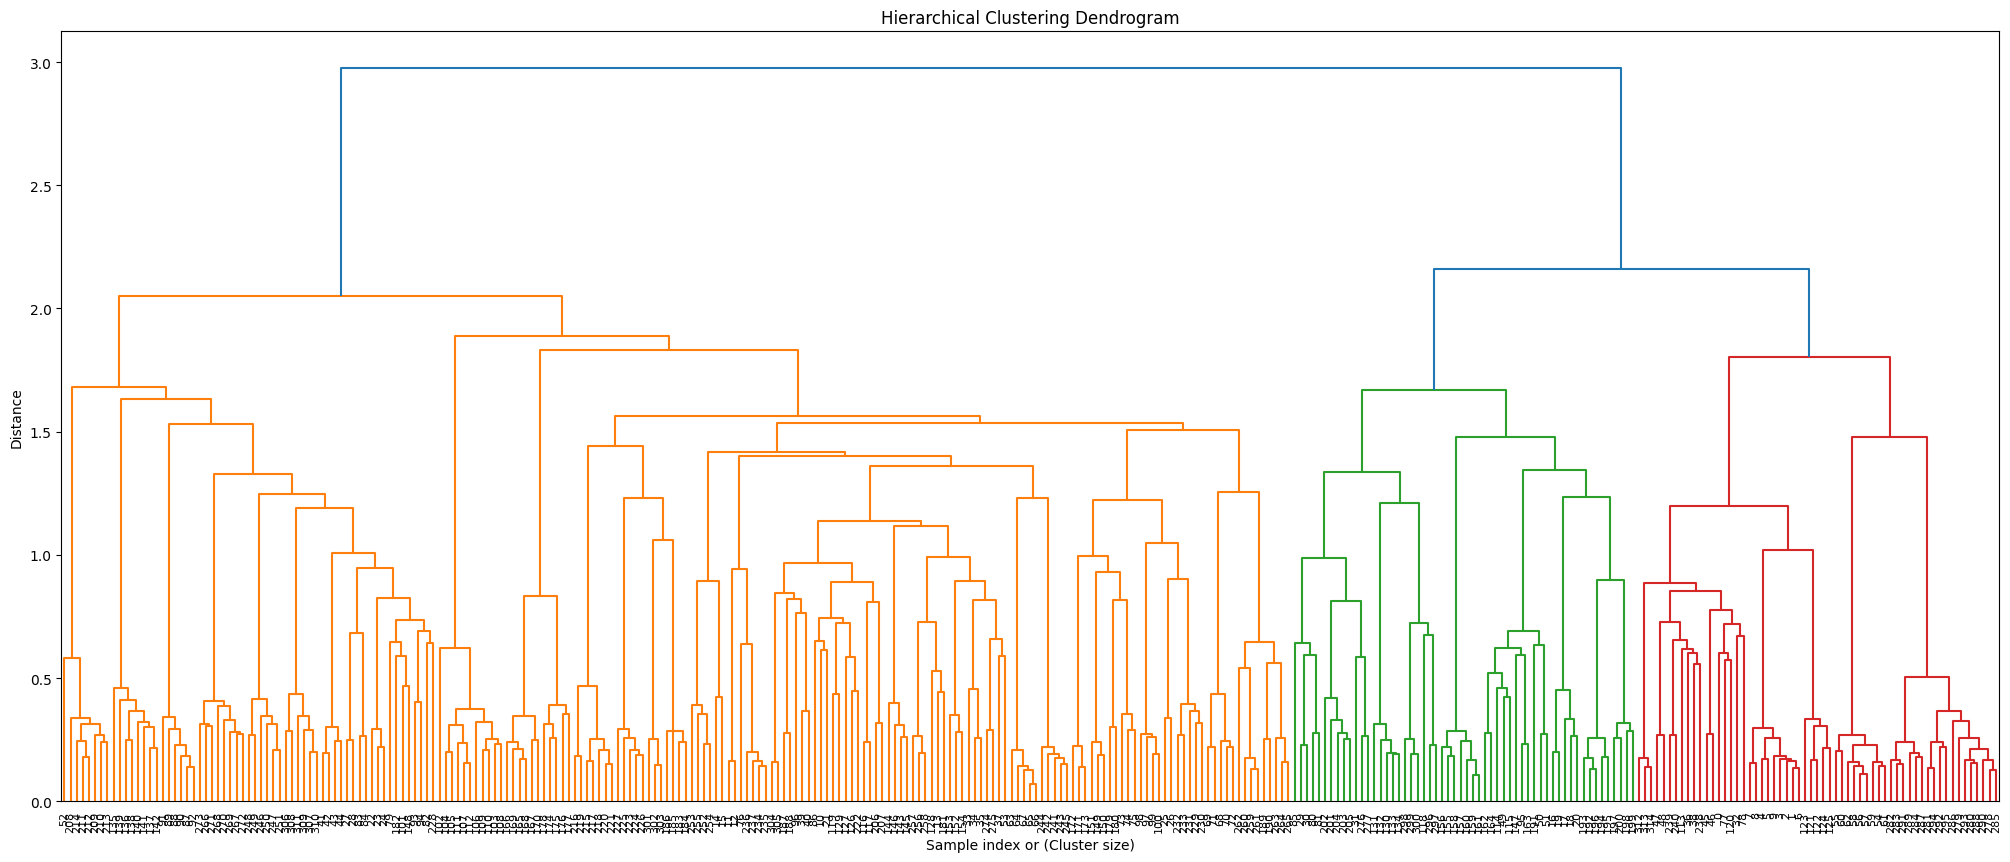

In [18]:
# Perform hierarchical clustering
Z = linkage(matrix, 'ward')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

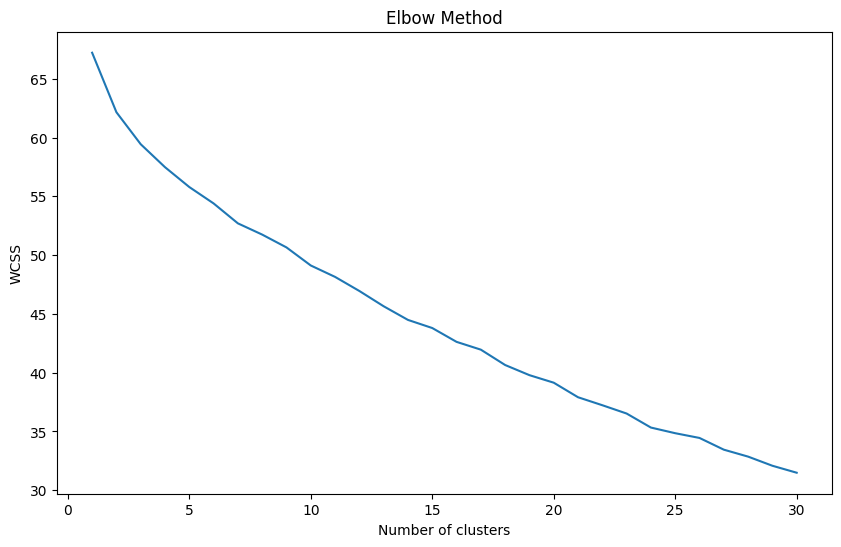

In [19]:
# Check with kmeans to be sure about amount of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'matrix' is the embeddings matrix obtained from get_openai_embeddings function
wcss = []
for i in range(1, 31):  # Test for k values from 1 to 10, adjust the range as necessary
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=15, random_state=0)
    kmeans.fit(matrix)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


In [21]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00


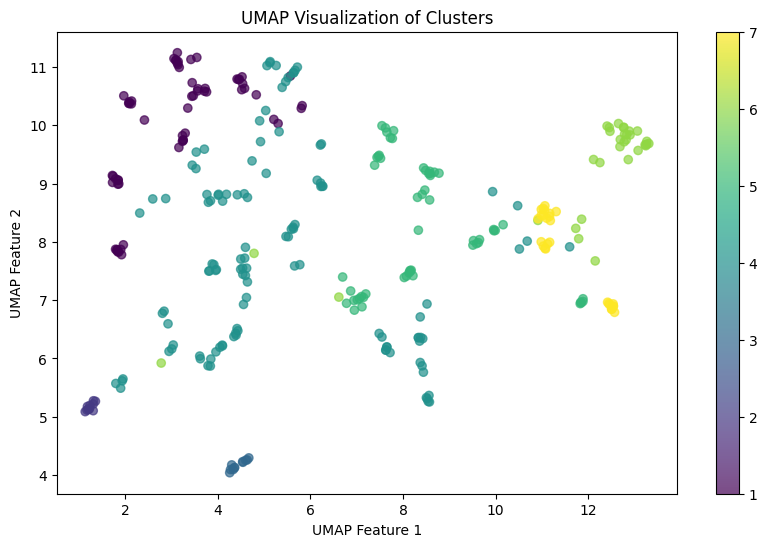

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, fcluster
import umap

# Assuming that 'matrix' is already defined and contains your embeddings
# Perform hierarchical clustering to define 'clusters'
Z = linkage(matrix, 'ward')
max_distance = 1.8  # You might need to adjust this based on your dendrogram analysis
clusters = fcluster(Z, max_distance, criterion='distance')

# Now perform UMAP dimensionality reduction
umap_reducer = umap.UMAP()
umap_result = umap_reducer.fit_transform(matrix)  # Using the embeddings matrix directly

# Now plot using UMAP results and the clusters defined above
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.show()


In [24]:
df.head()

,issue_title,issue_description,combined_text,reworked_information
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27","Title: [MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI). Description: Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis jetzt. Freundliche Gr sse Kushtrim Veliji Bildungsdirektion Kanton Z rich Mittelschul und Berufsbildungsamt Digital Service Center Sek II Ausstellungsstrasse 80 8090 Z rich Telefon 043 259 77 27",- Issue: Development\n- Affected Systems: Typo 3 Website\n- Reported Problem: Request for layout adjustment on the Typo 3 website of Kantonsschule Wiedikon for mobile devices specifically for a video uploaded on the KWI website. Urgent ticket awaiting response since 27.02.2024. Contact person provided for further details.
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!","Title: [MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht. Description: Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png!","- Issue: IT-Systems\n- Affected Systems: Zimbra Mail Servers\n- Reported Problem: Users from the school (KSLZH) are unable to send or receive emails through the kslzh.ch domain and are facing issues with emails from external providers like GMX and icloud.com. Error m

In [25]:
### how many clusters do we have after the hierarchical clusteirng?
from scipy.cluster.hierarchy import fcluster
import numpy as np

# Assuming 'Z' is your linkage matrix from hierarchical clustering
# Specify the maximum cophenetic distance (this is an example value; adjust based on your dendrogram)
max_distance = 1.8

# Obtain the cluster labels
cluster_labels = fcluster(Z, max_distance, criterion='distance')

# Add the cluster labels to your DataFrame
df['cluster_label'] = cluster_labels

# Count the unique cluster labels
num_clusters = np.unique(cluster_labels).size

print(f"Number of clusters formed: {num_clusters}")


Number of clusters formed: 7


In [26]:
import re

# Define a function to remove subtitles from the text
def remove_subtitles(text):
    patterns = ['Issue:', 'Affected Systems:', 'Reported Problem:', 'User', 'user', 'issue']
    for pattern in patterns:
        text = re.sub(pattern, '', text)
    return text.strip()

# Apply the function to each ticket
df['cleaned_information'] = df['reworked_information'].apply(remove_subtitles)

# Now you can proceed with using 'cleaned_information' for generating embeddings


SHOWING IN A WORD CLOUD - CLUSTERS

In [27]:
!pip install wordcloud

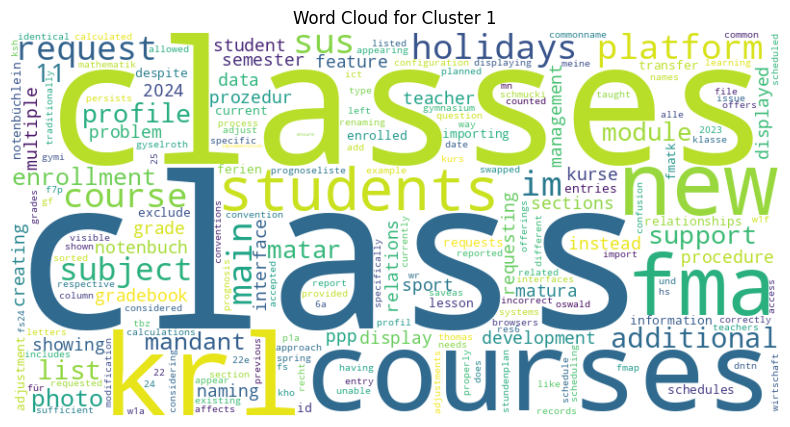

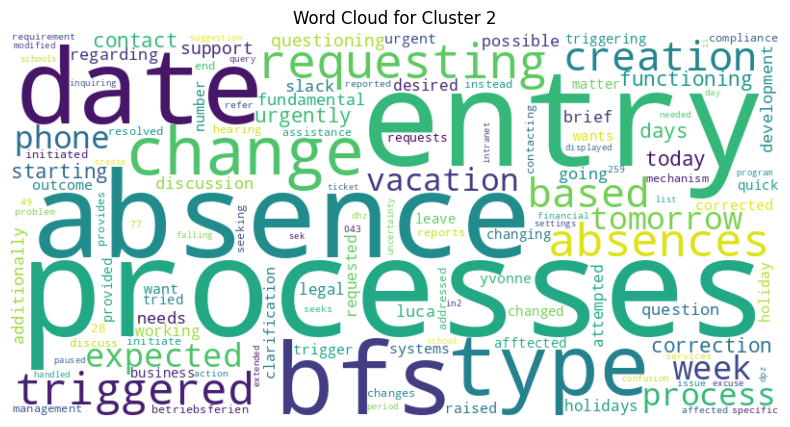

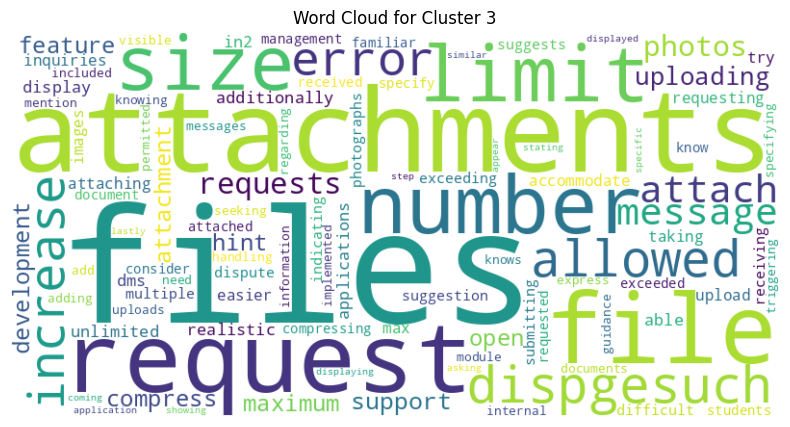

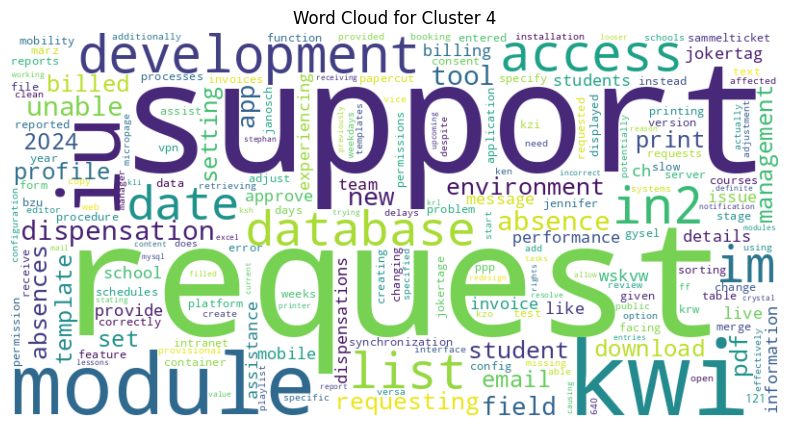

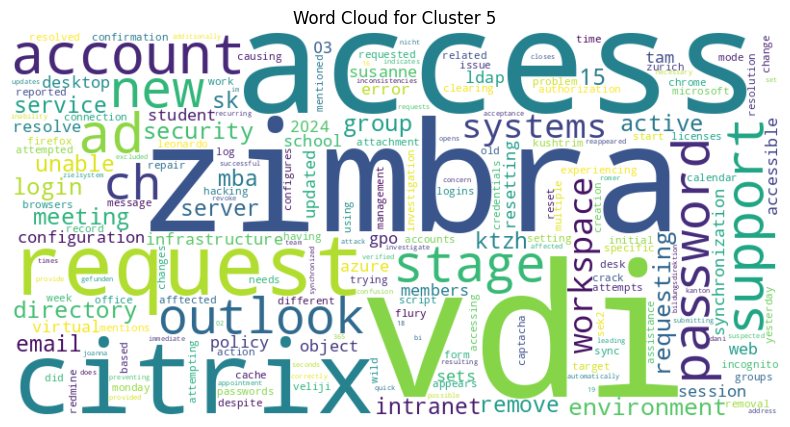

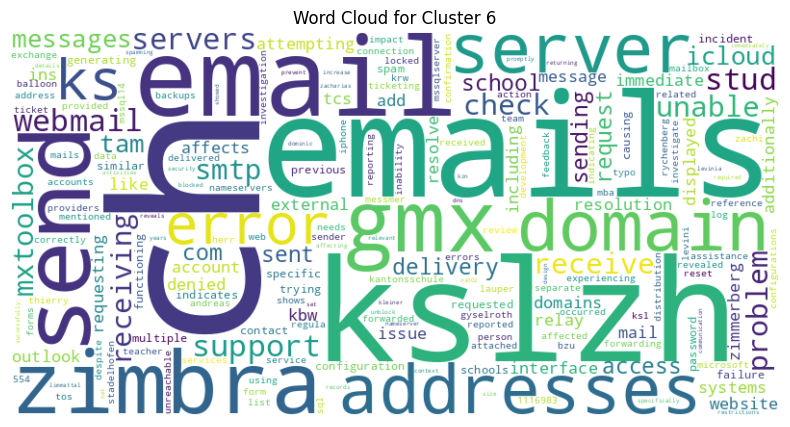

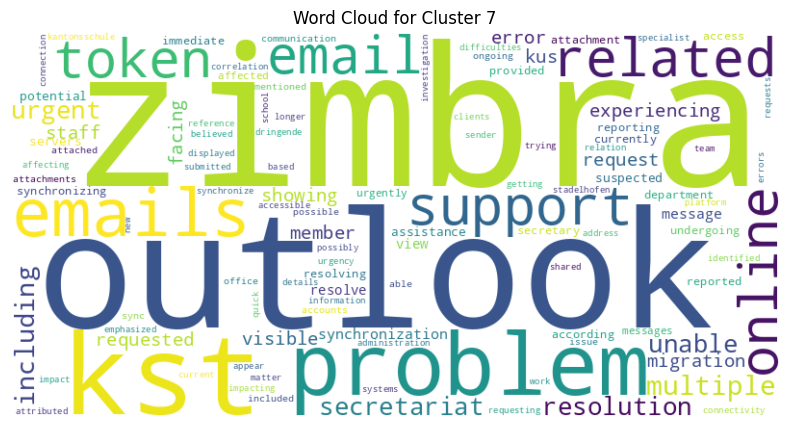

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'clusters' contains cluster labels
df['cluster_label'] = clusters
unique_clusters = np.unique(clusters)

for cluster_num in unique_clusters:
    cluster_data = df[df['cluster_label'] == cluster_num]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['cleaned_information'])
    terms = tfidf_vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1

    # Create a dictionary of word frequencies for word cloud
    freqs = dict(zip(terms, scores))

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'clusters' contains cluster labels
df['cluster_label'] = clusters
unique_clusters = np.unique(clusters)

labels = []
for cluster_num in unique_clusters:
    cluster_data = df[df['cluster_label'] == cluster_num]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['cleaned_information'])
    order = tfidf_matrix.sum(axis=0).argsort()[0, ::-1]
    terms = np.array(tfidf_vectorizer.get_feature_names_out())[order].flat[:5]  # Top 5 terms
    label = ', '.join(terms)
    labels.append(label)
    print(f"Cluster {cluster_num} label: {label}")


Cluster 1 label: class, classes, krl, courses, new
Cluster 2 label: processes, entry, absence, date, bfs
Cluster 3 label: files, attachments, request, file, number
Cluster 4 label: request, support, kwi, module, iu
Cluster 5 label: vdi, zimbra, access, citrix, request
Cluster 6 label: ch, emails, kslzh, email, send
Cluster 7 label: zimbra, outlook, kst, problem, emails


CATEGORIZING NEW TICKETS TO ONE OF THE CLUSTERS WITHOUT THE NEED OF DOING THE WHOLE CLUSTERSTUFF ETC AGAIN

In [33]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import linkage, fcluster

# Let's assume your embeddings are stored in a variable named 'embeddings'
# and your DataFrame df has the existing cluster labels

# Update the embeddings and df object to be mutable inside the function
def check_new_ticket(new_ticket_text, df, embeddings, threshold=1.8):
    # Assume get_embeddings is your function to get embeddings
    new_embedding = get_embeddings([new_ticket_text])[0]
    distances = euclidean_distances([new_embedding], embeddings).min()

    if distances > threshold:
        print("This ticket might belong to a new cluster.")
        # Update DataFrame and clustering
        new_label = df['cluster_label'].max() + 1
        df.loc[len(df)] = {'processed_text': new_ticket_text, 'cluster_label': new_label}
        # Append the new embedding to the existing matrix
        embeddings = np.vstack([embeddings, new_embedding])
        # Recalculate linkage; consider incremental clustering in future optimizations
        Z = linkage(embeddings, 'ward')
        plot_dendrogram(Z)  # Visualize if necessary
    else:
        print("This ticket belongs to an existing cluster.")

    return df, embeddings, Z

# Example of checking a new ticket
new_ticket = "Example of a new support ticket text that might be an anomaly."
df, embeddings, Z = check_new_ticket(new_ticket, df, embeddings)


NameError: name 'embeddings' is not defined